# American Sign Language (ASL) Image Classification

Welcome to the ASL Image Classification project! This notebook will guide you through loading, visualizing, preprocessing, training, and evaluating a deep learning model for recognizing American Sign Language hand gestures from images.

## 📁 Dataset Overview
- The dataset is organized in folders, one for each ASL letter (A-Z, 0-9).
- Each folder contains grayscale images of hand gestures representing the corresponding letter or digit.
- Example path: `Dataset/asl_dataset/a/hand1_a_bot_seg_1_cropped.jpeg`

## 1. Import Required Libraries

In [4]:
# Import necessary modules
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from PIL import Image

# 2. Load Images and Labels
image_size = (64, 64)
X = []
y = []

for label in classes:  # 'classes' is already defined in CELL INDEX: 5
    img_folder = os.path.join(dataset_path, label)
    if not os.path.isdir(img_folder):
        continue  # Skip if not a directory
    for img_name in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_name)
        if os.path.isdir(img_path):
            continue  # Skip directories
        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                img = img.resize(image_size)
                X.append(np.array(img))
                y.append(label)
        except Exception as e:
            print(f"Skipped {img_path}: {e}")
X = np.array(X)
y = np.array(y)
print(f"Loaded {len(X)} images. Shape: {X.shape}")


Loaded 2515 images. Shape: (2515, 64, 64, 3)


## 2. Set Dataset Path and List Classes

In [5]:
# 1. Set Dataset Path and List Classes
import os

# Update the dataset path to the correct location
dataset_path = r"c:/Users/shrey/Desktop/Netsmartz/American_Sign_lang/Dataset/asl_dataset"

# Check if the path exists
if not os.path.exists(dataset_path):
    print(f"Debugging: The specified path does not exist: {dataset_path}")
    print("Please verify the path and ensure the folder exists.")
    raise FileNotFoundError(f"The specified path does not exist: {dataset_path}")

# List classes if the path exists
classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
print("Classes:", classes)

Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'asl_dataset', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


## 3. Visualize Sample Images
Let's look at a few sample images from different classes.

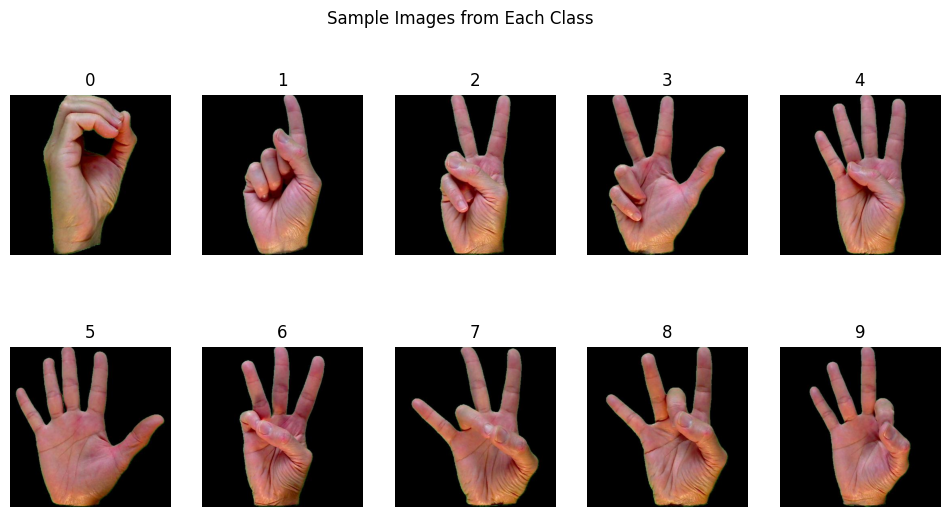

In [6]:
# 3. Visualize Sample Images
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
shown = 0
for label in classes:
    img_folder = os.path.join(dataset_path, label)
    img_files = [f for f in os.listdir(img_folder) if not os.path.isdir(os.path.join(img_folder, f))]
    if not img_files:
        continue
    img_path = os.path.join(img_folder, img_files[0])
    try:
        img = Image.open(img_path)
        plt.subplot(2, 5, shown+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
        shown += 1
        if shown == 10:
            break
    except Exception as e:
        print(f"Could not display {img_path}: {e}")
plt.suptitle('Sample Images from Each Class')
plt.show()

## 4. Load and Preprocess the Data
- Resize images to 64x64
- Convert to grayscale
- Normalize pixel values

In [7]:
image_size = (64, 64)
X = []
y = []
for label in classes:
    img_folder = os.path.join(dataset_path, label)
    if not os.path.isdir(img_folder):  # Skip if not a valid directory
        print(f"Skipping invalid folder: {img_folder}")
        continue
    for img_name in os.listdir(img_folder):
        img_path = os.path.join(img_folder, img_name)
        try:
            img = Image.open(img_path).convert('L').resize(image_size)
            X.append(np.array(img))
            y.append(label)
        except PermissionError as e:
            print(f"PermissionError: {e} - Skipping file: {img_path}")
        except Exception as e:
            print(f"Error: {e} - Skipping file: {img_path}")
X = np.array(X)
y = np.array(y)
print("Data shape:", X.shape, y.shape)

# (Removed duplicate image loading code. Data is already loaded above.)
# You can proceed with preprocessing, splitting, and modeling below.

PermissionError: [Errno 13] Permission denied: 'c:/Users/shrey/Desktop/Netsmartz/American_Sign_lang/Dataset/asl_dataset\\asl_dataset\\0' - Skipping file: c:/Users/shrey/Desktop/Netsmartz/American_Sign_lang/Dataset/asl_dataset\asl_dataset\0
PermissionError: [Errno 13] Permission denied: 'c:/Users/shrey/Desktop/Netsmartz/American_Sign_lang/Dataset/asl_dataset\\asl_dataset\\1' - Skipping file: c:/Users/shrey/Desktop/Netsmartz/American_Sign_lang/Dataset/asl_dataset\asl_dataset\1
PermissionError: [Errno 13] Permission denied: 'c:/Users/shrey/Desktop/Netsmartz/American_Sign_lang/Dataset/asl_dataset\\asl_dataset\\2' - Skipping file: c:/Users/shrey/Desktop/Netsmartz/American_Sign_lang/Dataset/asl_dataset\asl_dataset\2
PermissionError: [Errno 13] Permission denied: 'c:/Users/shrey/Desktop/Netsmartz/American_Sign_lang/Dataset/asl_dataset\\asl_dataset\\3' - Skipping file: c:/Users/shrey/Desktop/Netsmartz/American_Sign_lang/Dataset/asl_dataset\asl_dataset\3
PermissionError: [Errno 13] Permission d

## 5. Encode Labels and Split Data

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X = X / 255.0  # Normalize
X = X[..., np.newaxis]  # Add channel dimension
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (2012, 64, 64, 1) (2012,)
Test shape: (503, 64, 64, 1) (503,)


## 6. Build a Simple CNN Model

In [9]:
model = keras.Sequential([
    keras.Input(shape=(64,64,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,629,349 (6.22 MB)

 Trainable params: 1,629,349 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Train the Model

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3201 - loss: 2.5785 - val_accuracy: 0.8020 - val_loss: 0.7060
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.3201 - loss: 2.5785 - val_accuracy: 0.8020 - val_loss: 0.7060
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8387 - loss: 0.5225 - val_accuracy: 0.8911 - val_loss: 0.4006
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8387 - loss: 0.5225 - val_accuracy: 0.8911 - val_loss: 0.4006
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9376 - loss: 0.1979 - val_accuracy: 0.9455 - val_loss: 0.2395
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9376 - loss: 0.1979 - val_accuracy: 0.9455 - val_loss: 0.2395
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9762 - loss: 0.0910 - val_accuracy: 0.9505 - val_loss: 0.1866
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9762 - loss: 0.0910 - val_accuracy: 0.9505 - v

## 8. Evaluate the Model

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

16/16 - 0s - 12ms/step - accuracy: 0.9702 - loss: 0.0763
Test accuracy: 0.9702
Test accuracy: 0.9702


## 9. Visualize Training History

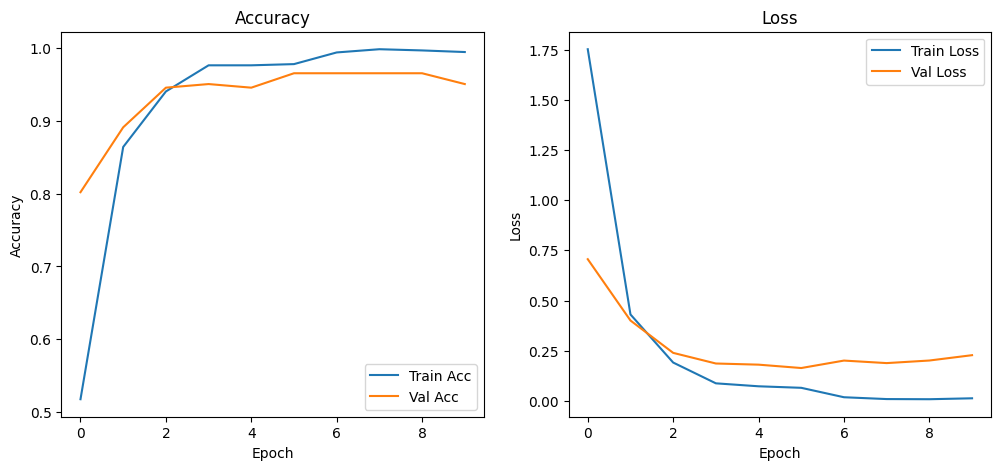

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 10. Predict and Visualize Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


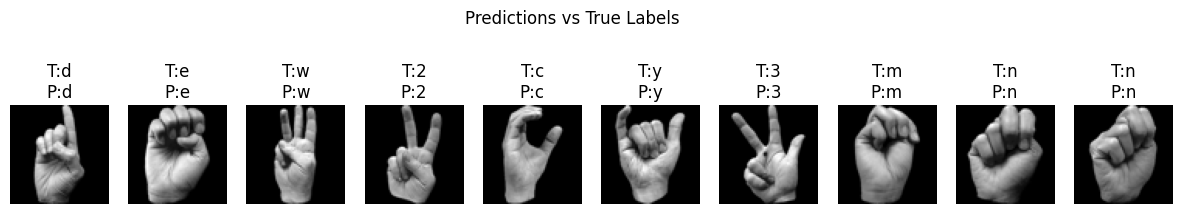

In [13]:
# Predict on a few test images
preds = model.predict(X_test[:10])
pred_labels = le.inverse_transform(np.argmax(preds, axis=1))
true_labels = le.inverse_transform(y_test[:10])
plt.figure(figsize=(15,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title(f"T:{true_labels[i]}\nP:{pred_labels[i]}")
    plt.axis('off')
plt.suptitle('Predictions vs True Labels')
plt.show()